## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# 1. INTRODUCTION

## Business Statements

## Data Source

### Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## Methodology

# 2. DATA CLEANING & PREPARATION

In [835]:
#import all necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_context("talk", rc={"lines.linewidth": 2})
sns.set_style('darkgrid')

In [836]:
#load dataset and view the first 5 rows
kc_house = pd.read_csv('./Data & Figures/kc_house_data.csv')
kc_house.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [837]:
#get all column names
kc_house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [838]:
#review number of rows and columns
kc_house.shape

(21597, 21)

There are 21597 samples and 21 features for each.

In [839]:
#look at all columns together with their datatype
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Deal with duplicates

In [840]:
#check to see if 'id' is unique identifier for each sample
kc_house['id'].nunique()

21420

There are 21597 sample while 'id' has only 21420 counts, which means there are duplicates in the 'id' columns.

In [841]:
id_counts = kc_house['id'].value_counts()
id_counts.head(10)

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
3969300030    2
2560801222    2
3883800011    2
2228900270    2
251300110     2
Name: id, dtype: int64

In [842]:
id_counts.value_counts()

1    21244
2      175
3        1
Name: id, dtype: int64

### Deal with missing values

In [843]:
#check for null values
kc_house.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [844]:
#calculate how big a percentage of the missing values in 'waterfront' from the whole dataset is
((kc_house['waterfront'].isnull().sum()) / (len(kc_house)) * 100).round(2)

11.0

In [845]:
#calculate how big a percentage of the missing values in 'view' from the whole dataset is
((kc_house['view'].isnull().sum()) / (len(kc_house)) * 100).round(2)

0.29

In [846]:
#calculate how big a percentage of the missing values in 'yr_renovated' from the whole dataset is
((kc_house['yr_renovated'].isnull().sum()) / (len(kc_house)) * 100).round(2)

17.79

### Correct datatypes

In [847]:
#check to see if 'date' is datetime object
import datetime
isinstance(kc_house['date'][0], datetime.date)

False

In [848]:
#convert 'date' to datetime object
kc_house['date'] = pd.to_datetime(kc_house['date'])

#check again
isinstance(kc_house['date'][0], datetime.date)

True

In [849]:
#check to see if 'yr_built' is datetime object
isinstance(kc_house['yr_built'][0], datetime.date)

False

In [850]:
#convert 'yr_built' to datetime object
kc_house['yr_built'] = pd.to_datetime(kc_house['yr_built'])

#check again
isinstance(kc_house['yr_built'][0], datetime.date)

True

In [851]:
#check to see if 'yr_renovated' is datetime object
isinstance(kc_house['yr_renovated'][0], datetime.date)

False

In [852]:
#convert 'yr_renovated' to datetime object
kc_house['yr_renovated'] = pd.to_datetime(kc_house['yr_renovated'])

#check again
isinstance(kc_house['yr_renovated'][0], datetime.date)

True

# 3. EXPLORE DATA STATISTICS

In [853]:
#get data summary statistics
kc_house.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above       zipcode           lat          long  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       7.657915   1788.596842  98077.951845     47.560093   -122.213982   
std        1.173200    827.759761     53.513072      0.138552      0.140724   
min        3.000000    370.000000  98001.000000     47.155900   -122.519000   
25%        7.000000   1190.000000  98033.000000     47.471100   -122.328000   
50%        7.000000   1560.000000  98065.000000     47.571800   -122.231000   
75%        8.000000   2210.000000  98118.000000     47.678000   -122.125000   
max       13.000000   9410.000000  98199.000000     47.777600   -121.315000   

       sqft_living15     sqft_lot15  
count   21597.000000   21597.000000  
mean     1986.620318   12758.283512  
std       685.230472   27274.441950  
min       399.000000     651.000000  
25%      1490.000000    5100.000000  
50%      1840.000000    7620.000000  
75%      2360.000000   10083.000000  
max      6210.000000  871200.000000

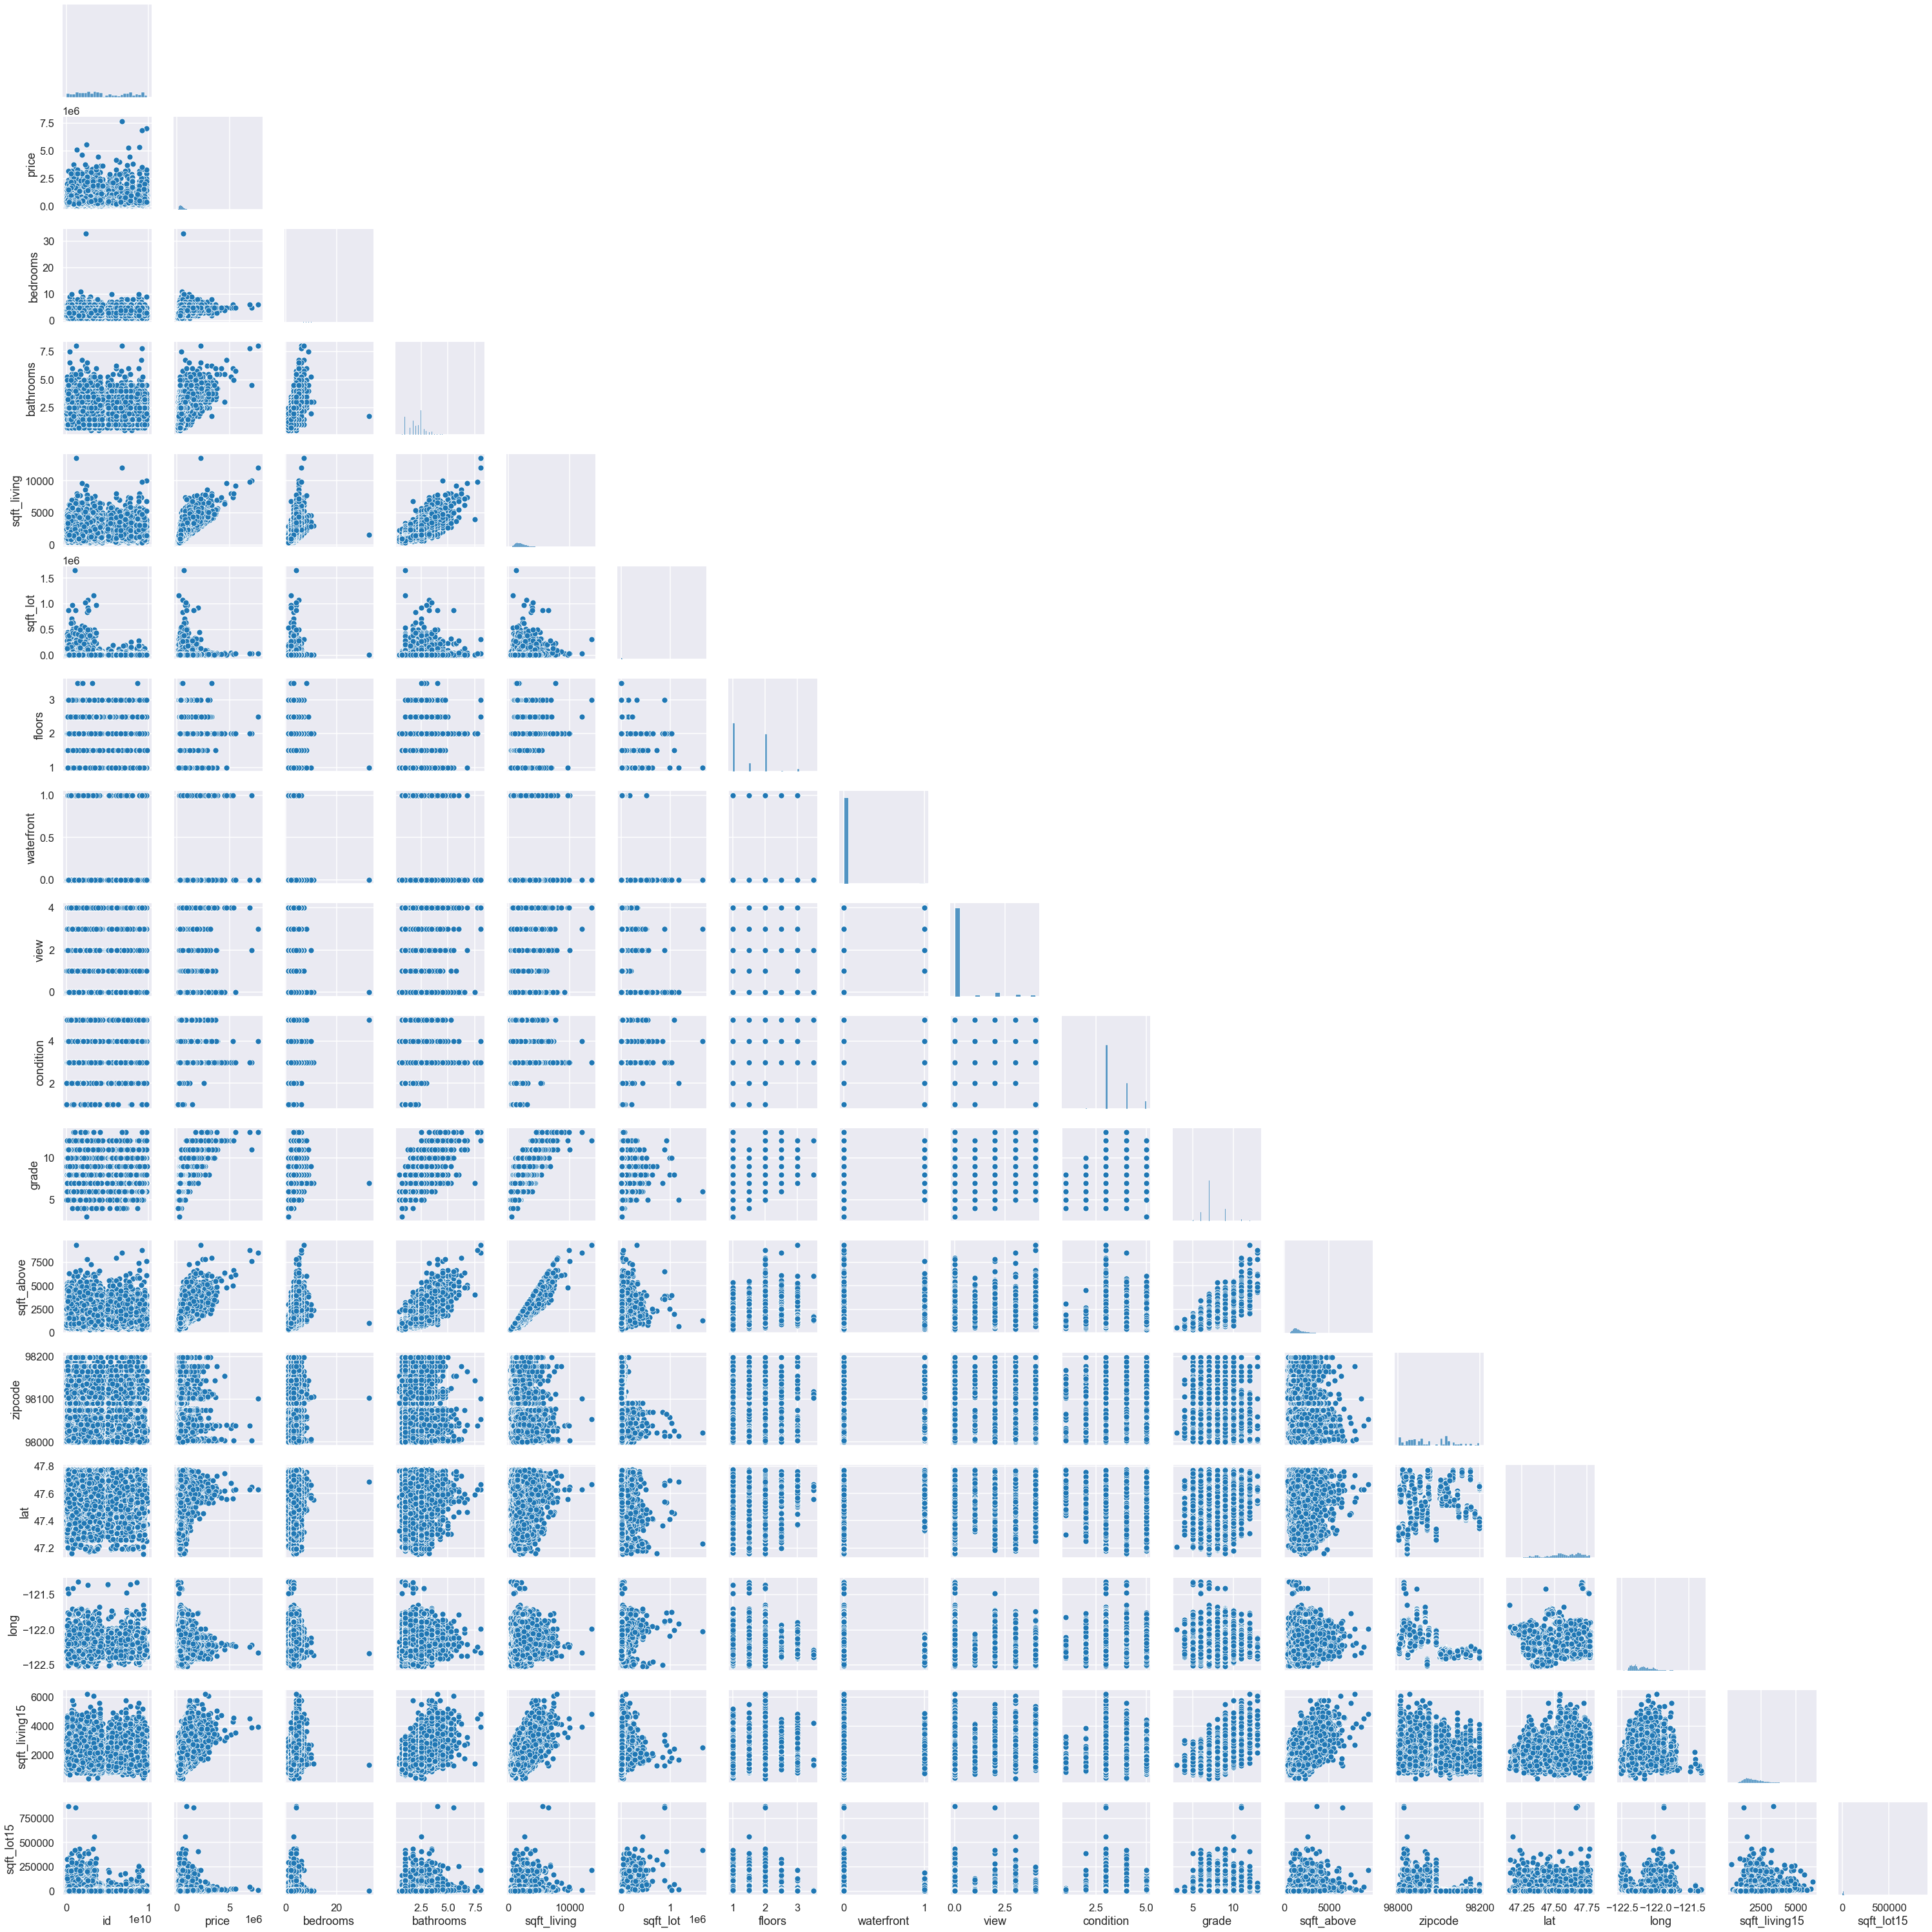

In [964]:
sns.pairplot(kc_house, diag_kind = 'hist', corner = True)

In [965]:
#save
plt.savefig('./Data & Figures/all_pairplot')

<Figure size 432x288 with 0 Axes>

In [958]:
continuous = ['sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
categoricals = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

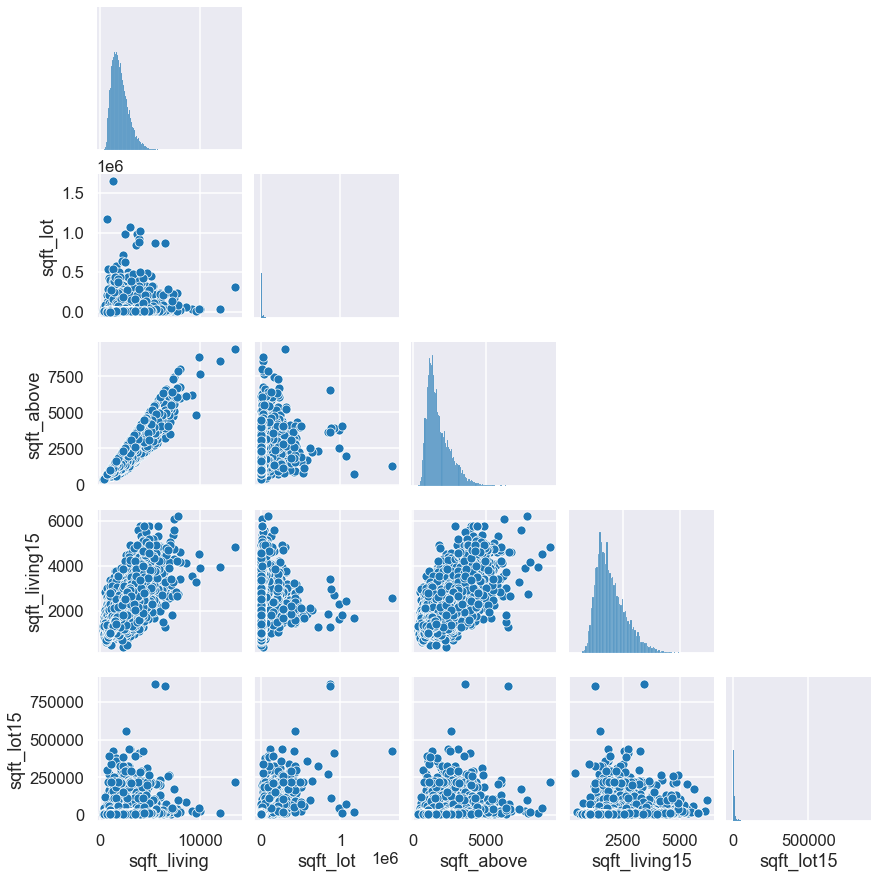

In [959]:
sns.pairplot(kc_house[continuous], diag_kind = 'hist', corner = True)

In [961]:
#save
plt.savefig('./Data & Figures/continuous_pairplot')

<Figure size 432x288 with 0 Axes>

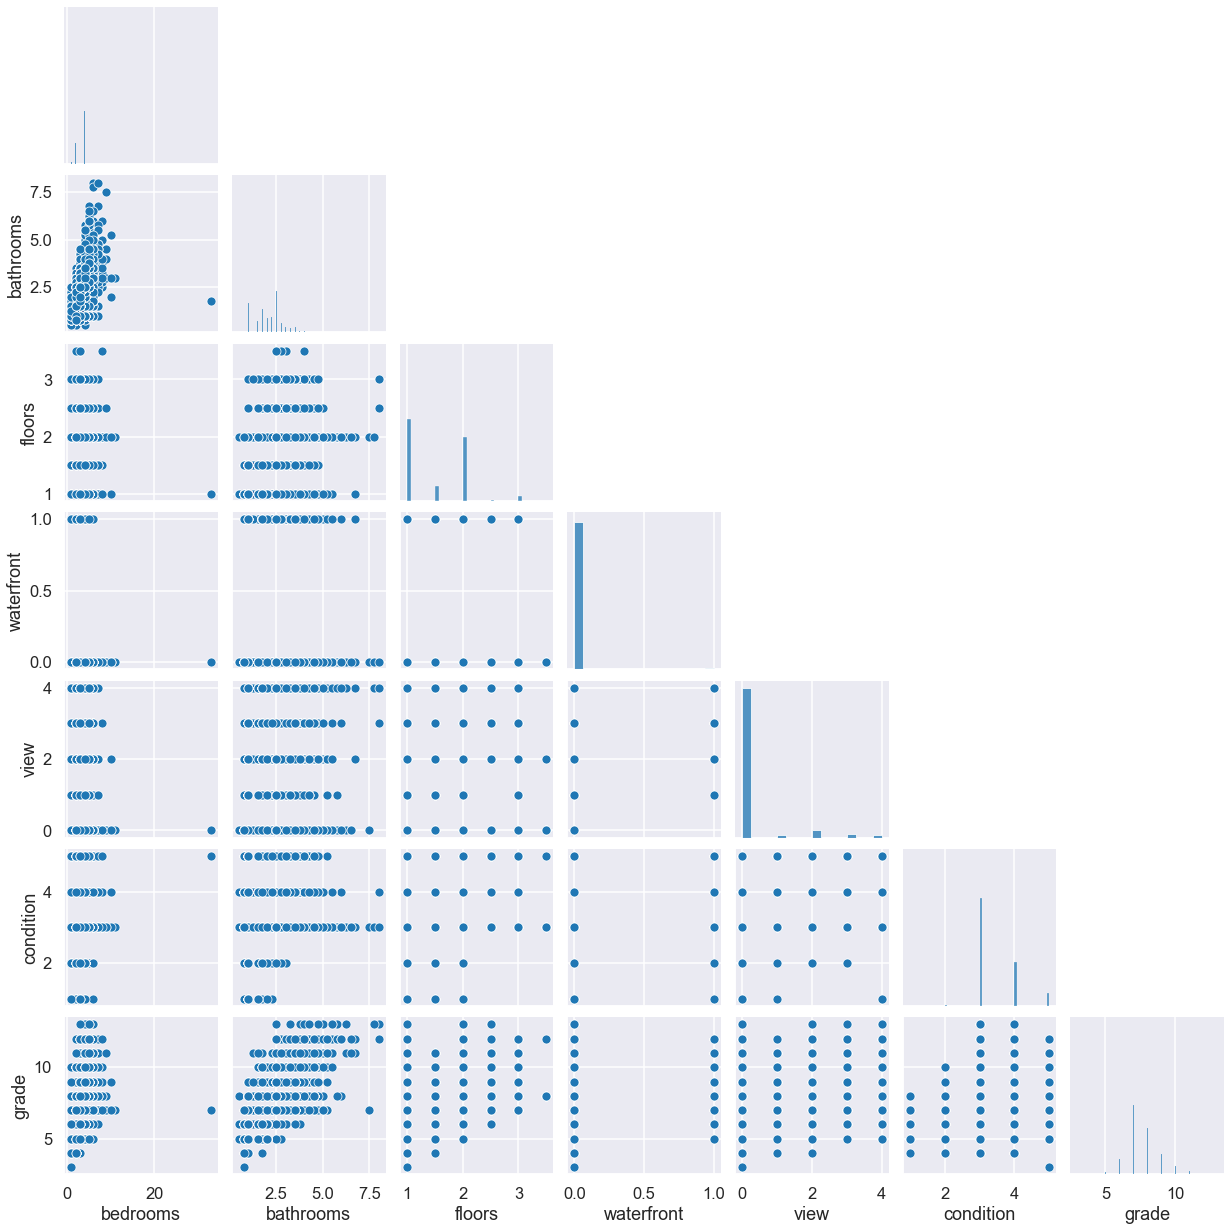

In [962]:
sns.pairplot(kc_house[categoricals], diag_kind = 'hist', corner = True)

In [963]:
#save
plt.savefig('./Data & Figures/categoricals_pairplot')

<Figure size 432x288 with 0 Axes>

## Continuous Data

### Price

In [859]:
#look at summary statistics & remove scientific notation
kc_house['price'].describe().apply(lambda x: format(x, 'f'))

count      21597.000000
mean      540296.573506
std       367368.140101
min        78000.000000
25%       322000.000000
50%       450000.000000
75%       645000.000000
max      7700000.000000
Name: price, dtype: object

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


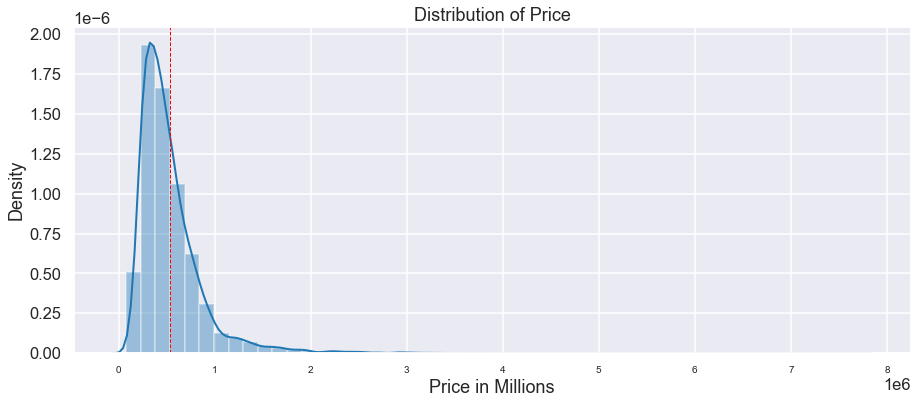

In [860]:
#plot 'price'
plt.figure(figsize = (15, 6))
sns.distplot(kc_house['price'])

#set labels
plt.title('Distribution of Price')
plt.xlabel('Price in Millions')

#draw mean()
plt.axvline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

In [861]:
#save
plt.savefig('./Data & Figures/price_distribution_distplot')

<Figure size 432x288 with 0 Axes>

### Square footage of the home: sqft_living

In [862]:
#look at summary statistics & remove scientific notation
kc_house['sqft_living'].describe().apply(lambda x: format(x, 'f'))

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: object

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


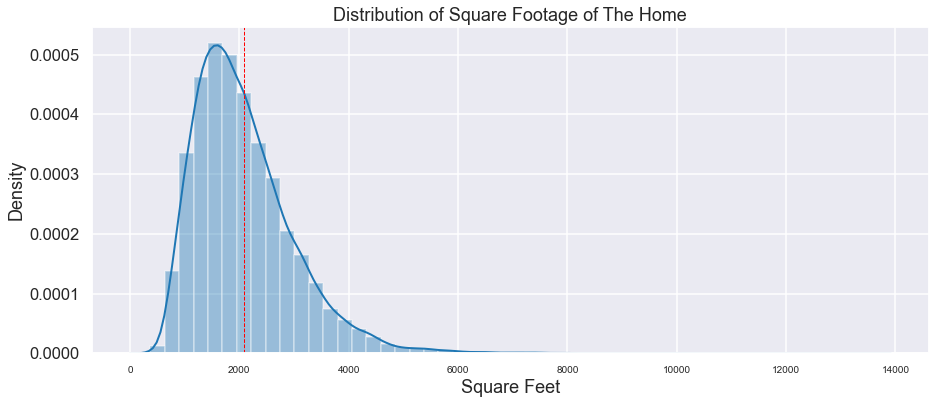

In [863]:
#plot 'sqft_living'
plt.figure(figsize = (15, 6))
sns.distplot(kc_house['sqft_living'])

#set labels
plt.title('Distribution of Square Footage of The Home')
plt.xlabel('Square Feet')

#draw mean()
plt.axvline(kc_house['sqft_living'].mean(),
           ls = '--', lw = 1, color = 'r')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

In [864]:
#save
plt.savefig('./Data & Figures/sqft_living_distribution_distplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

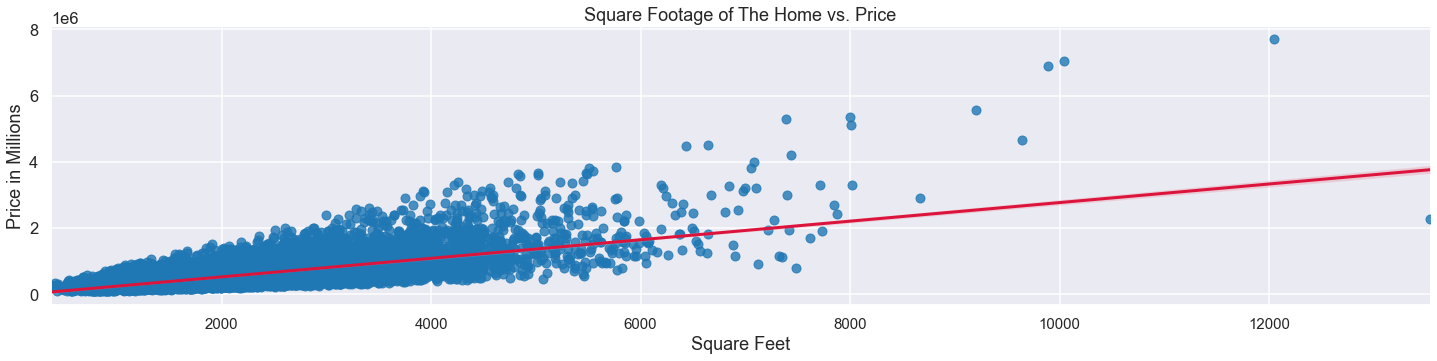

In [865]:
#plot 'price' vs. sqft_living'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'sqft_living',
           y = 'price',
           data = kc_house, 
           aspect = 4, line_kws={'color': 'crimson'})

#set labels
plt.title('Square Footage of The Home vs. Price')
plt.xlabel('Square Feet')
plt.ylabel('Price in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [866]:
#save
plt.savefig('./Data & Figures/sqft_living_vs_price_lmplot')

<Figure size 432x288 with 0 Axes>

In [867]:
from scipy import stats

#get Pearson correlation coefficient of 'production_budget' vs. worldwide_profit'
#write r2 function
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

#get Pearson correlation coefficient
#print('The Pearson correlation coefficient is:', r2(kc_house['price', kc_house['sqft_living']]))

### Square footage of the lot: sqft_lot

In [868]:
#look at summary statistics & remove scientific notation
kc_house['sqft_lot'].describe().apply(lambda x: format(x, 'f'))

count      21597.000000
mean       15099.408760
std        41412.636876
min          520.000000
25%         5040.000000
50%         7618.000000
75%        10685.000000
max      1651359.000000
Name: sqft_lot, dtype: object

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


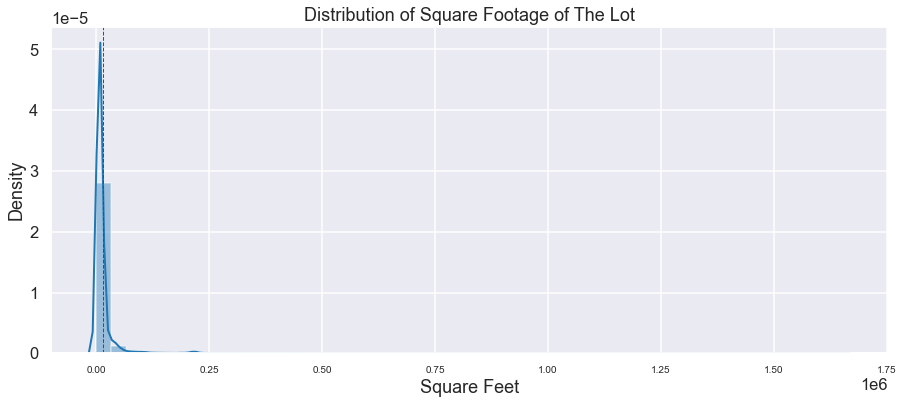

In [869]:
#plot 'sqft_lot'
plt.figure(figsize = (15, 6))
sns.distplot(kc_house['sqft_lot'])

#set labels
plt.title('Distribution of Square Footage of The Lot')
plt.xlabel('Square Feet')

#draw mean()
plt.axvline(kc_house['sqft_lot'].mean(),
           ls = '--', lw = 1, color = 'r')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

In [870]:
#save
plt.savefig('./Data & Figures/sqft_lot_distribution_distplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

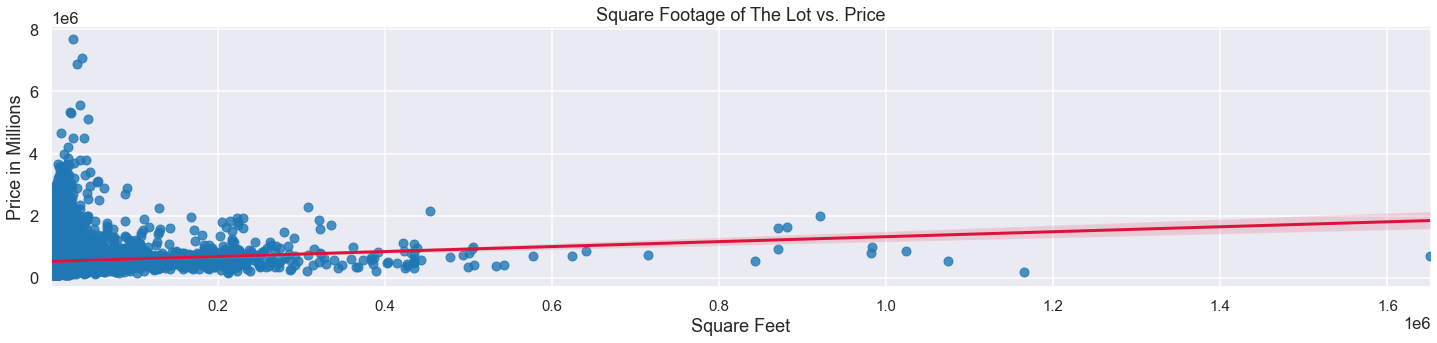

In [871]:
#plot 'price' vs. sqft_lot'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'sqft_lot',
           y = 'price',
           data = kc_house, 
           aspect = 4, line_kws={'color': 'crimson'})

#set labels
plt.title('Square Footage of The Lot vs. Price')
plt.xlabel('Square Feet')
plt.ylabel('Price in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [872]:
#save
plt.savefig('./Data & Figures/sqft_lot_vs_price_lmplot')

<Figure size 432x288 with 0 Axes>

In [873]:
#get Pearson correlation coefficient
#print('The Pearson correlation coefficient is:', r2(kc_house['price', kc_house['sqft_lot']]))

### Square footage of house apart from basement: sqft_above

In [874]:
#look at summary statistics & remove scientific notation
kc_house['sqft_above'].describe().apply(lambda x: format(x, 'f'))

count    21597.000000
mean      1788.596842
std        827.759761
min        370.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: object

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


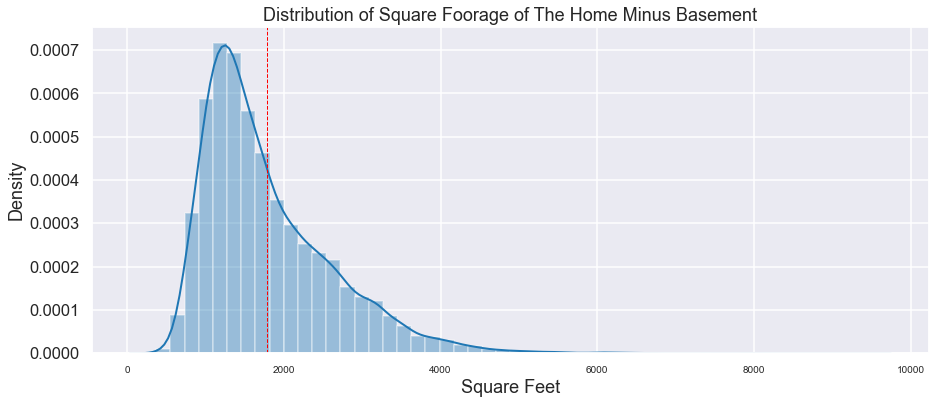

In [875]:
#plot 'sqft_above'
plt.figure(figsize = (15, 6))
sns.distplot(kc_house['sqft_above'])

#set labels
plt.title('Distribution of Square Foorage of The Home Minus Basement')
plt.xlabel('Square Feet')

#draw mean()
plt.axvline(kc_house['sqft_above'].mean(),
           ls = '--', lw = 1, color = 'r')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

In [876]:
#save
plt.savefig('./Data & Figures/sqft_above_distribution_distplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

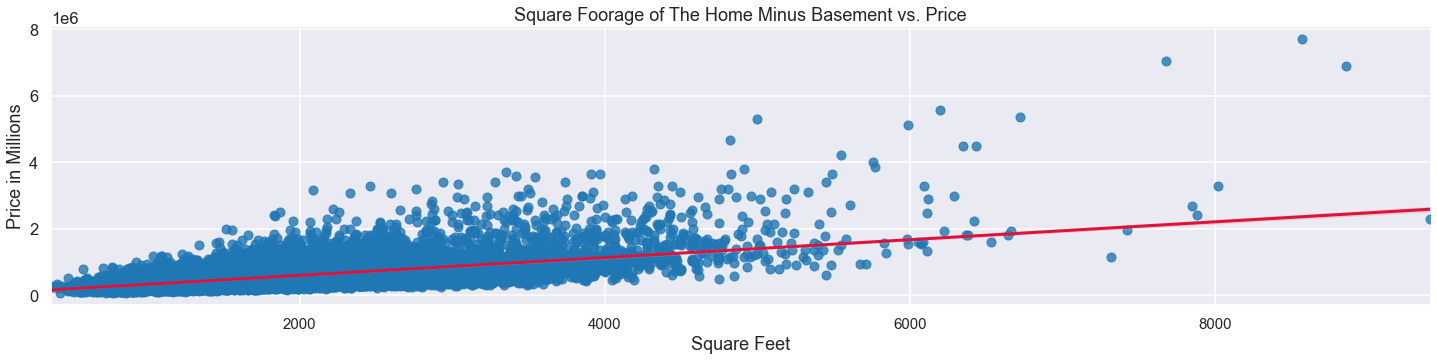

In [877]:
#plot 'price' vs. sqft_above'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'sqft_above',
           y = 'price',
           data = kc_house, 
           aspect = 4, line_kws={'color': 'crimson'})

#set labels
plt.title('Square Foorage of The Home Minus Basement vs. Price')
plt.xlabel('Square Feet')
plt.ylabel('Price in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [878]:
#save
plt.savefig('./Data & Figures/sqft_above_vs_price_lmplot')

<Figure size 432x288 with 0 Axes>

In [879]:
#get Pearson correlation coefficient
#print('The Pearson correlation coefficient is:', r2(kc_house['price', kc_house['sqft_above']]))

### Square footage of interior housing living space for the nearest 15 neighbors: sqft_living15

In [880]:
#look at summary statistics & remove scientific notation
kc_house['sqft_living15'].describe().apply(lambda x: format(x, 'f'))

count    21597.000000
mean      1986.620318
std        685.230472
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2360.000000
max       6210.000000
Name: sqft_living15, dtype: object

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


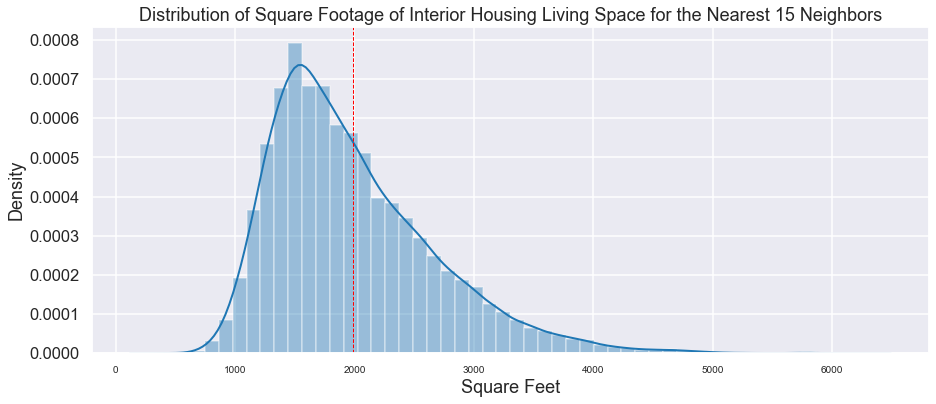

In [881]:
#plot 'sqft_living15'
plt.figure(figsize = (15, 6))
sns.distplot(kc_house['sqft_living15'])

#set labels
plt.title('Distribution of Square Footage of Interior Housing Living Space for the Nearest 15 Neighbors')
plt.xlabel('Square Feet')

#draw mean()
plt.axvline(kc_house['sqft_living15'].mean(),
           ls = '--', lw = 1, color = 'r')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

In [882]:
#save
plt.savefig('./Data & Figures/sqft_living15_distribution_distplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

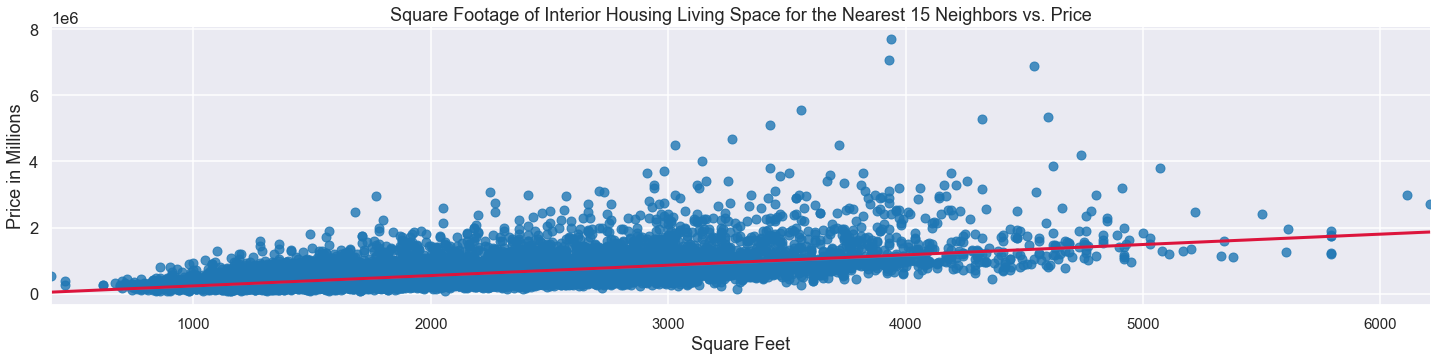

In [883]:
#plot 'price' vs. sqft_living15'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'sqft_living15',
           y = 'price',
           data = kc_house, 
           aspect = 4, line_kws={'color': 'crimson'})

#set labels
plt.title('Square Footage of Interior Housing Living Space for the Nearest 15 Neighbors vs. Price')
plt.xlabel('Square Feet')
plt.ylabel('Price in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [884]:
#save
plt.savefig('./Data & Figures/sqft_living15_vs_price_lmplot')

<Figure size 432x288 with 0 Axes>

In [885]:
#get Pearson correlation coefficient
#print('The Pearson correlation coefficient is:', r2(kc_house['price', kc_house['sqft_above']]))

### Square footage of the land lots of the nearest 15 neighbors: sqft_lot15

In [886]:
#look at summary statistics & remove scientific notation
kc_house['sqft_lot15'].describe().apply(lambda x: format(x, 'f'))

count     21597.000000
mean      12758.283512
std       27274.441950
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10083.000000
max      871200.000000
Name: sqft_lot15, dtype: object

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


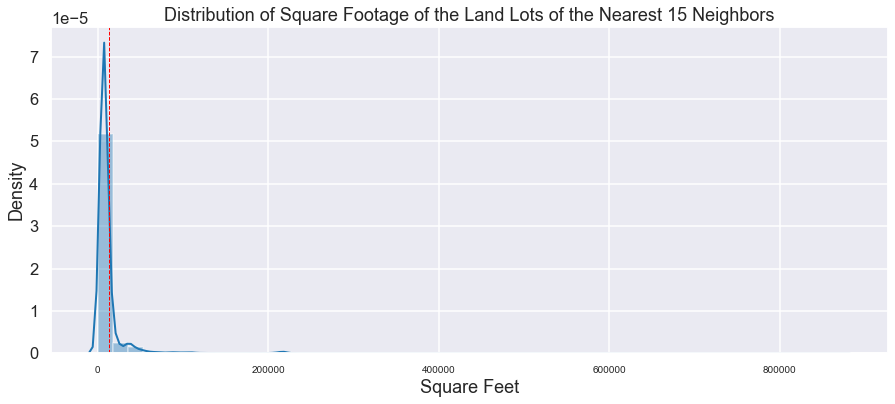

In [887]:
#plot 'sqft_lot15'
plt.figure(figsize = (15, 6))
sns.distplot(kc_house['sqft_lot15'])

#set labels
plt.title('Distribution of Square Footage of the Land Lots of the Nearest 15 Neighbors')
plt.xlabel('Square Feet')

#draw mean()
plt.axvline(kc_house['sqft_lot15'].mean(),
           ls = '--', lw = 1, color = 'r')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

In [888]:
#save
plt.savefig('./Data & Figures/sqft_lot15_distribution_distplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

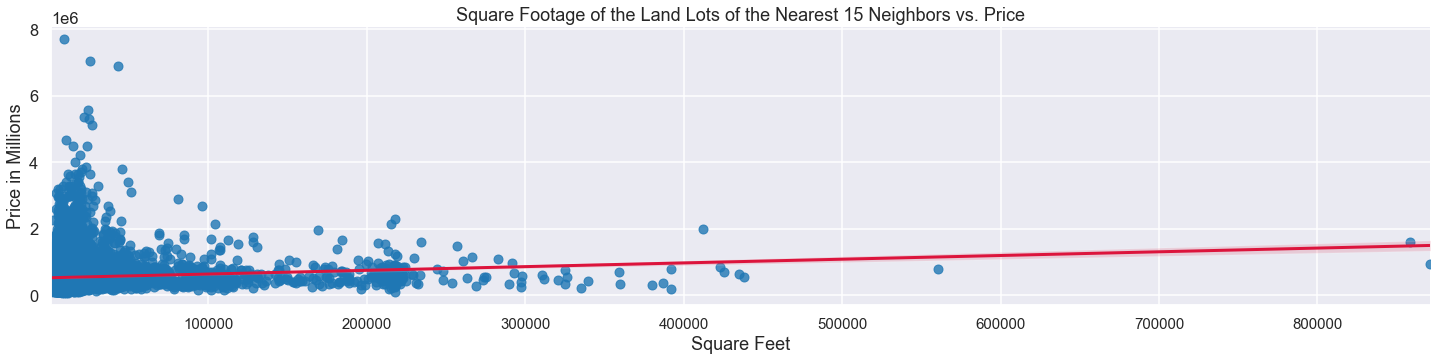

In [889]:
#plot 'price' vs. sqft_lot15'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'sqft_lot15',
           y = 'price',
           data = kc_house, 
           aspect = 4, line_kws={'color': 'crimson'})

#set labels
plt.title('Square Footage of the Land Lots of the Nearest 15 Neighbors vs. Price')
plt.xlabel('Square Feet')
plt.ylabel('Price in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [890]:
#save
plt.savefig('./Data & Figures/sqft_lot15_vs_price_lmplot')

<Figure size 432x288 with 0 Axes>

In [891]:
#get Pearson correlation coefficient
#print('The Pearson correlation coefficient is:', r2(kc_house['price', kc_house['sqft_above']]))

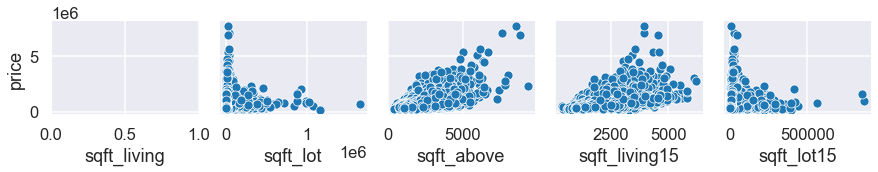

In [892]:
sns.pairplot(data = kc_house, 
             x_vars = ['sqft_living','sqft_lot','sqft_above','sqft_living15','sqft_lot15'], 
             y_vars = ['price'])

## Categorical Data

### Bedrooms

In [893]:
kc_house['bedrooms'].nunique()

12

In [894]:
y_values = kc_house['bedrooms'].value_counts(ascending=False)
x_values = y_values.index

y_values

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


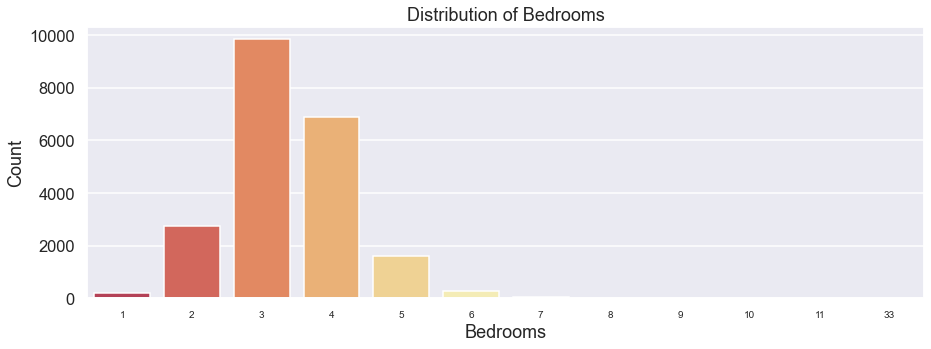

In [895]:
#plot 'bedroom' distribution
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, 
            palette = "Spectral")

#set labels
plt.title('Distribution of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

In [896]:
#save
plt.savefig('./Data & Figures/bedrooms_distribution_barplot')

<Figure size 432x288 with 0 Axes>

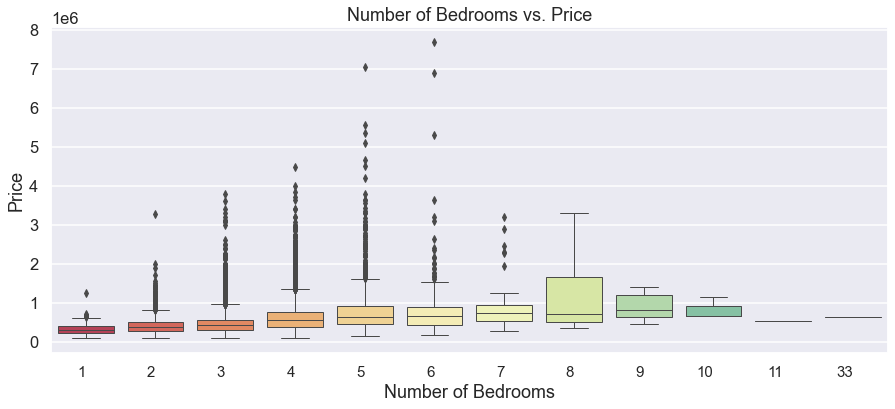

In [897]:
#plot 'bedrooms' vs. 'price'
plt.figure(figsize = (15, 6))
sns.boxplot(x = kc_house['bedrooms'], 
            y = kc_house['price'], 
            linewidth = 1,
            palette = 'Spectral')

#set labels
plt.title('Number of Bedrooms vs. Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')

#set xticks
plt.xticks(ha = 'right', fontsize = 15)

#show
plt.show()

In [898]:
#save
plt.savefig('./Data & Figures/bedrooms_vs_price_boxplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

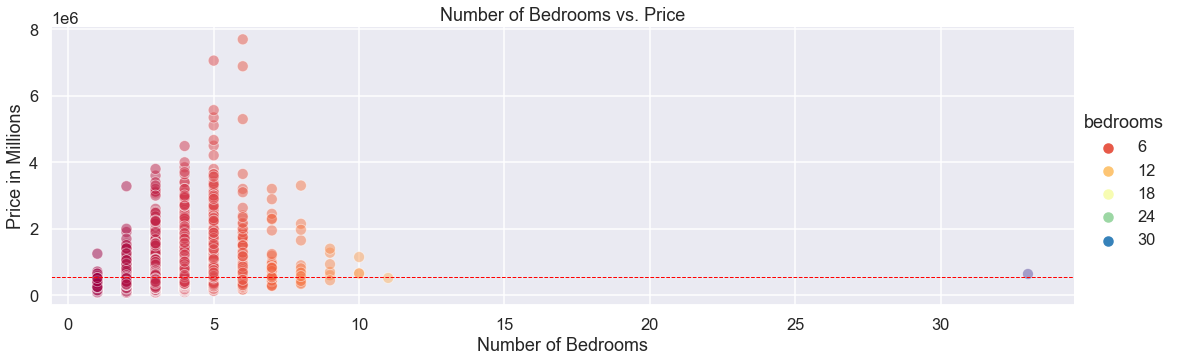

In [899]:
#plot 'bedrooms' vs 'price' 
plt.figure(figsize = (15, 15))
sns.relplot(x = 'bedrooms',
            y = 'price',
            hue = 'bedrooms',
            data = kc_house,
            alpha = 0.5, s = 120, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Number of Bedrooms vs. Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price in Millions')

#show
plt.show()

In [900]:
#save
plt.savefig('./Data & Figures/bedrooms_vs_price_relplot')

<Figure size 432x288 with 0 Axes>

### Bathrooms

In [901]:
kc_house['bathrooms'].nunique()

29

In [902]:
y_values = kc_house['bathrooms'].value_counts(ascending=False)
x_values = y_values.index

y_values

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


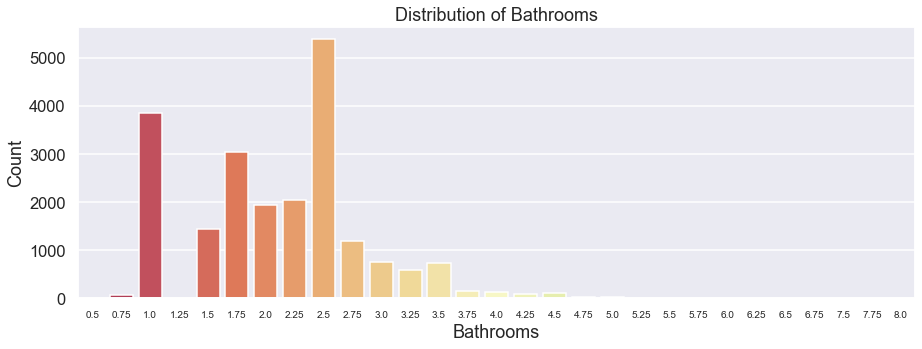

In [903]:
#plot 'bathrooms' distribution
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, 
            palette = "Spectral")

#set labels
plt.title('Distribution of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

In [904]:
#save
plt.savefig('./Data & Figures/bathrooms_distribution_barplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

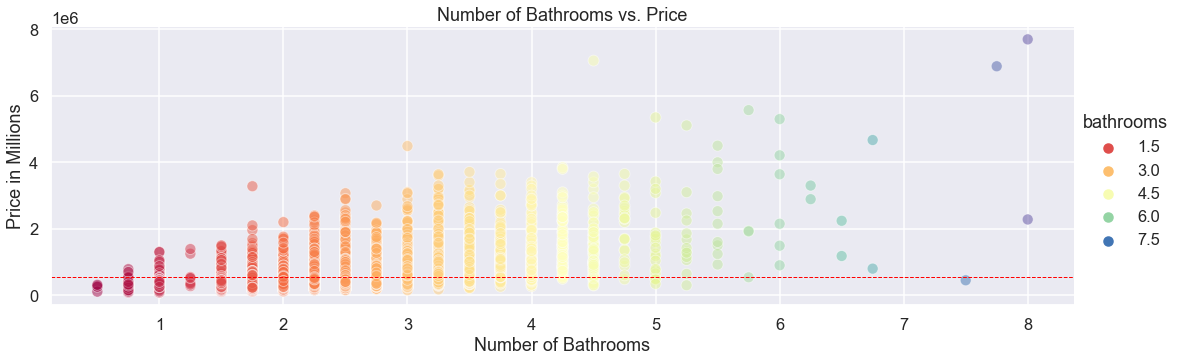

In [905]:
#plot 'bathrooms' vs 'price' 
plt.figure(figsize = (15, 15))
sns.relplot(x = 'bathrooms',
            y = 'price',
            hue = 'bathrooms',
            data = kc_house,
            alpha = 0.5, s = 120, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Number of Bathrooms vs. Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price in Millions')

#show
plt.show()

In [906]:
#save
plt.savefig('./Data & Figures/bathrooms_vs_price_relplot')

<Figure size 432x288 with 0 Axes>

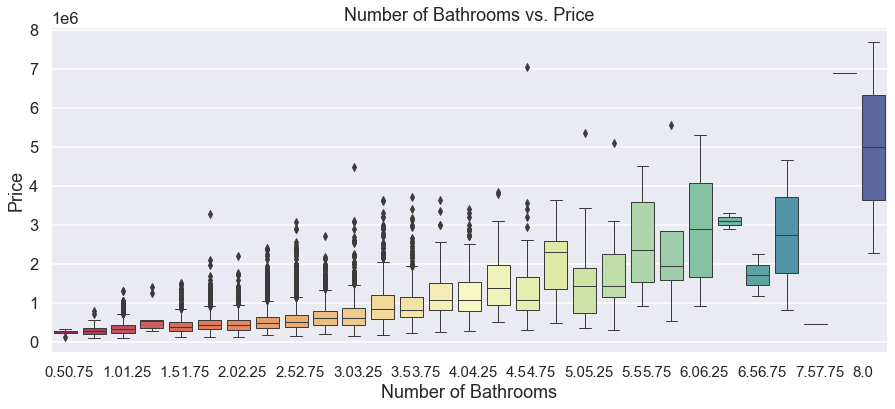

In [907]:
#plot 'bathrooms' vs. 'price'
plt.figure(figsize = (15, 6))
sns.boxplot(x = kc_house['bathrooms'], 
            y = kc_house['price'], 
            linewidth = 1,
            palette = 'Spectral')

#set labels
plt.title('Number of Bathrooms vs. Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')

#set xticks
plt.xticks(ha = 'right', fontsize = 15)

#show
plt.show()

In [908]:
#save
plt.savefig('./Data & Figures/bathrooms_vs_price_boxplot')

<Figure size 432x288 with 0 Axes>

### Floors

In [909]:
kc_house['floors'].nunique()

6

In [910]:
y_values = kc_house['floors'].value_counts(ascending=False)
x_values = y_values.index

y_values

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


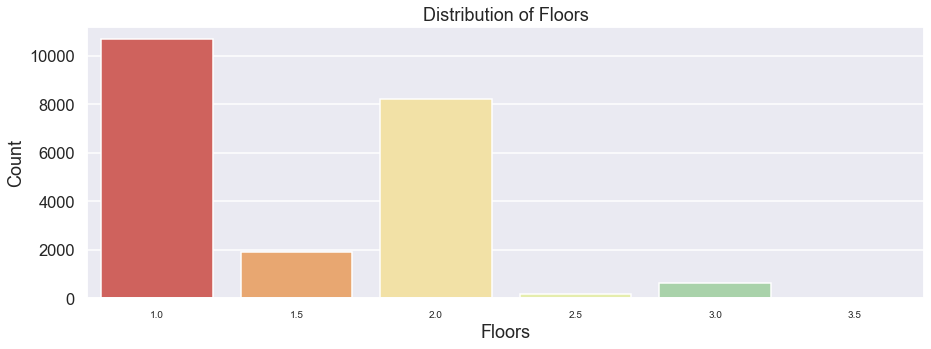

In [911]:
#plot 'floors' distribution
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, 
            palette = "Spectral")

#set labels
plt.title('Distribution of Floors')
plt.xlabel('Floors')
plt.ylabel('Count')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

In [912]:
#save
plt.savefig('./Data & Figures/floors_distribution_barplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

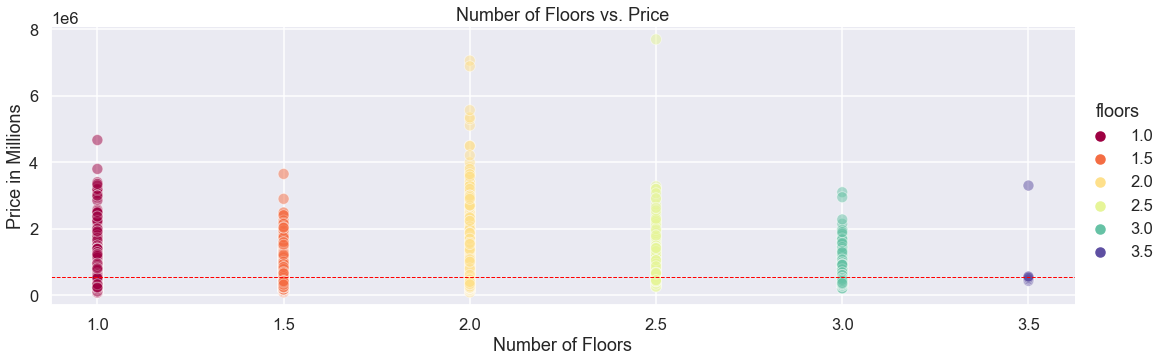

In [913]:
#plot 'floors' vs 'price' 
plt.figure(figsize = (15, 15))
sns.relplot(x = 'floors',
            y = 'price',
            hue = 'floors',
            data = kc_house,
            alpha = 0.5, s = 120, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Number of Floors vs. Price')
plt.xlabel('Number of Floors')
plt.ylabel('Price in Millions')

#show
plt.show()

In [914]:
#save
plt.savefig('./Data & Figures/floors_vs_price_relplot')

<Figure size 432x288 with 0 Axes>

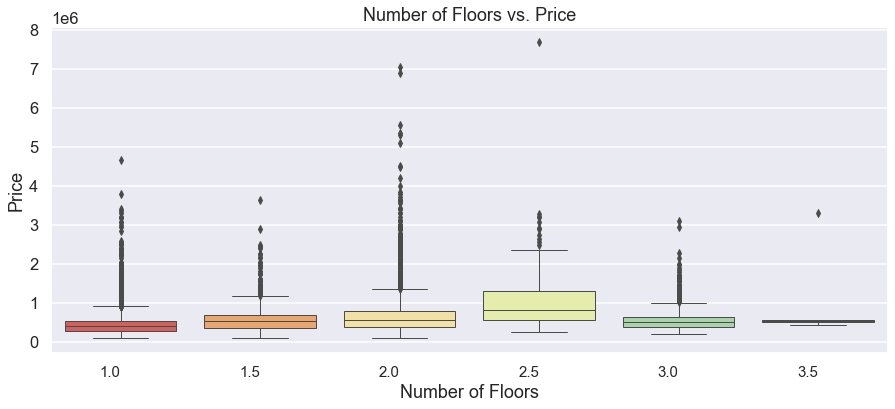

In [915]:
#plot 'floors' vs. 'price'
plt.figure(figsize = (15, 6))
sns.boxplot(x = kc_house['floors'], 
            y = kc_house['price'], 
            linewidth = 1,
            palette = 'Spectral')

#set labels
plt.title('Number of Floors vs. Price')
plt.xlabel('Number of Floors')
plt.ylabel('Price')

#set xticks
plt.xticks(ha = 'right', fontsize = 15)

#show
plt.show()

In [916]:
#save
plt.savefig('./Data & Figures/floors_vs_price_boxplot')

<Figure size 432x288 with 0 Axes>

### Waterfront

In [917]:
kc_house['waterfront'].nunique()

2

In [918]:
y_values = kc_house['waterfront'].value_counts(ascending=False)
x_values = y_values.index

y_values

0.0    19075
1.0      146
Name: waterfront, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


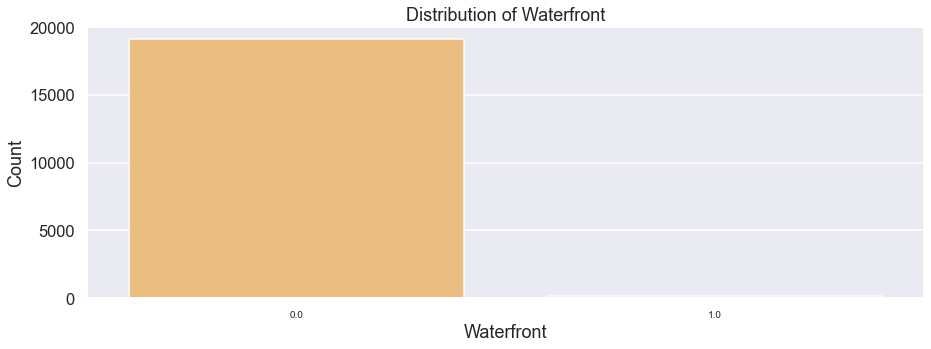

In [919]:
#plot 'waterfront' distribution
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, 
            palette = "Spectral")

#set labels
plt.title('Distribution of Waterfront')
plt.xlabel('Waterfront')
plt.ylabel('Count')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

In [920]:
#save
plt.savefig('./Data & Figures/waterfront_distribution_barplot')

<Figure size 432x288 with 0 Axes>

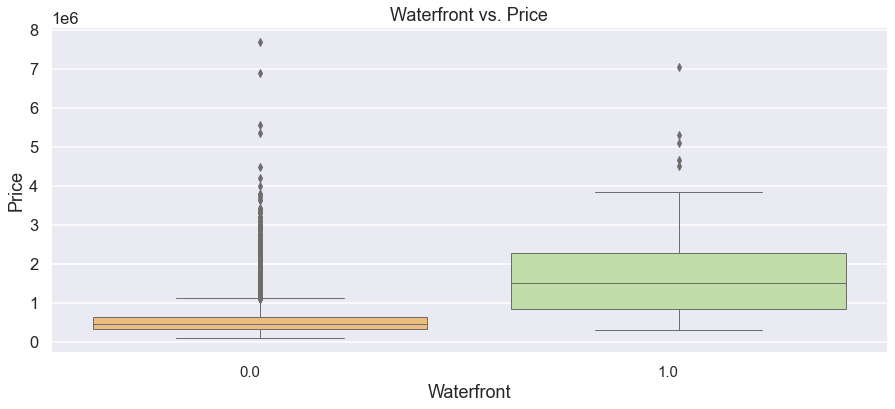

In [921]:
#plot 'waterfront' vs. 'price'
plt.figure(figsize = (15, 6))
sns.boxplot(x = kc_house['waterfront'], 
            y = kc_house['price'], 
            linewidth = 1,
            palette = 'Spectral')

#set labels
plt.title('Waterfront vs. Price')
plt.xlabel('Waterfront')
plt.ylabel('Price')

#set xticks
plt.xticks(ha = 'right', fontsize = 15)

#show
plt.show()

In [922]:
#save
plt.savefig('./Data & Figures/waterfront_vs_price_boxplot')

<Figure size 432x288 with 0 Axes>

### View

In [923]:
kc_house['view'].nunique()

5

In [924]:
y_values = kc_house['view'].value_counts(ascending = False)
x_values = y_values.index

y_values

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


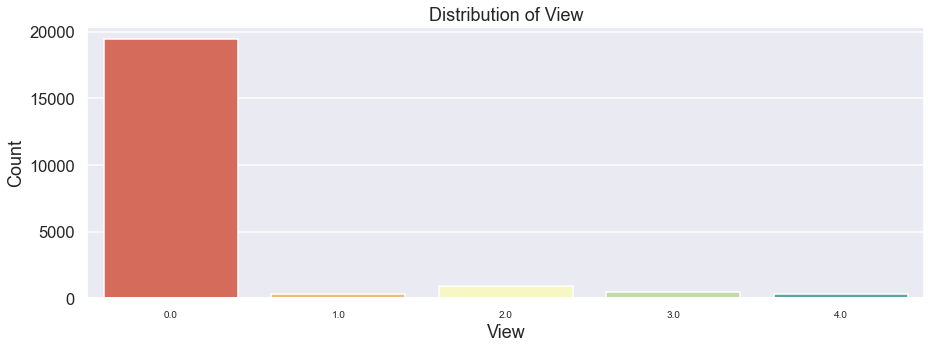

In [925]:
#plot 'view' distribution
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, 
            palette = "Spectral")

#set labels
plt.title('Distribution of View')
plt.xlabel('View')
plt.ylabel('Count')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

In [926]:
#save
plt.savefig('./Data & Figures/view_distribution_barplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

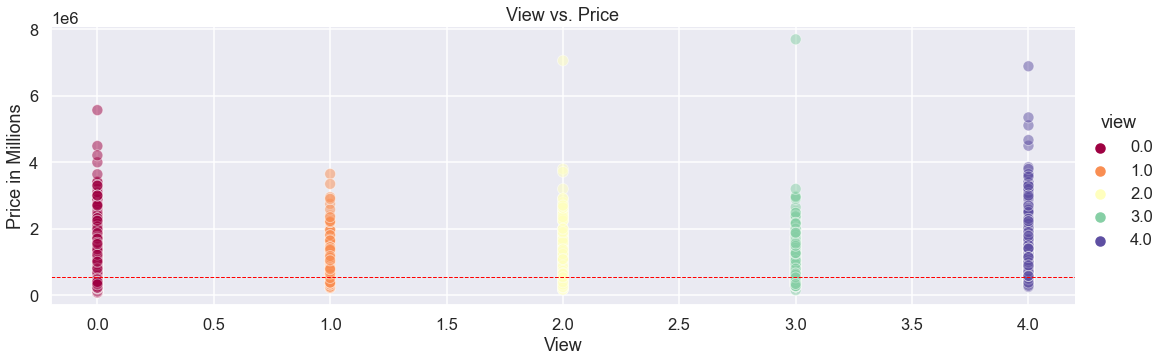

In [927]:
#plot 'view' vs 'price' 
plt.figure(figsize = (15, 15))
sns.relplot(x = 'view',
            y = 'price',
            hue = 'view',
            data = kc_house,
            alpha = 0.5, s = 120, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('View vs. Price')
plt.xlabel('View')
plt.ylabel('Price in Millions')

#show
plt.show()

In [928]:
#save
plt.savefig('./Data & Figures/view_vs_price_relplot')

<Figure size 432x288 with 0 Axes>

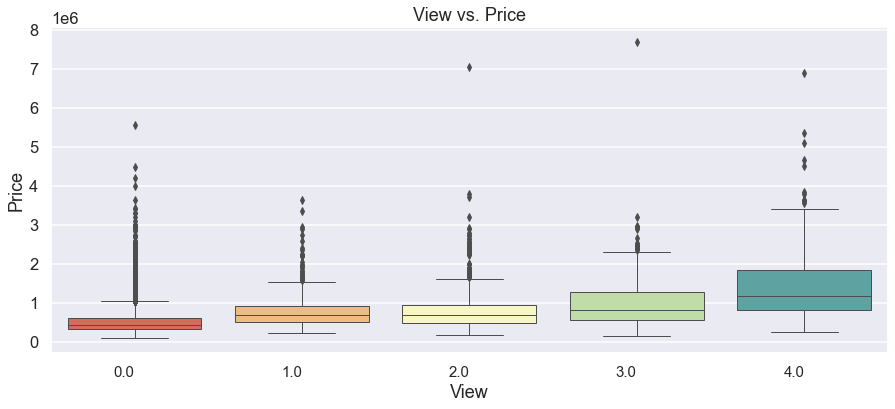

In [929]:
#plot 'view' vs. 'price'
plt.figure(figsize = (15, 6))
sns.boxplot(x = kc_house['view'], 
            y = kc_house['price'], 
            linewidth = 1,
            palette = 'Spectral')

#set labels
plt.title('View vs. Price')
plt.xlabel('View')
plt.ylabel('Price')

#set xticks
plt.xticks(ha = 'right', fontsize = 15)

#show
plt.show()

In [930]:
#save
plt.savefig('./Data & Figures/view_vs_price_boxplot')

<Figure size 432x288 with 0 Axes>

### Condition

In [931]:
kc_house['condition'].nunique()

5

In [932]:
y_values = kc_house['condition'].value_counts(ascending = False)
x_values = y_values.index

y_values

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


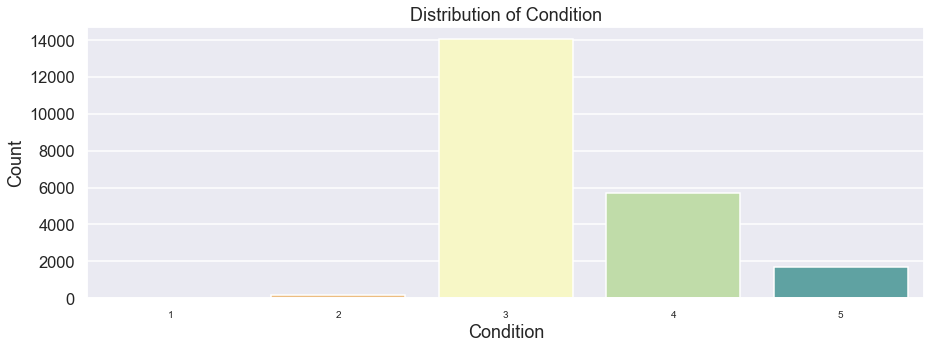

In [933]:
#plot 'condition' distribution
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, 
            palette = "Spectral")

#set labels
plt.title('Distribution of Condition')
plt.xlabel('Condition')
plt.ylabel('Count')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

In [934]:
#save
plt.savefig('./Data & Figures/condition_distribution_barplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

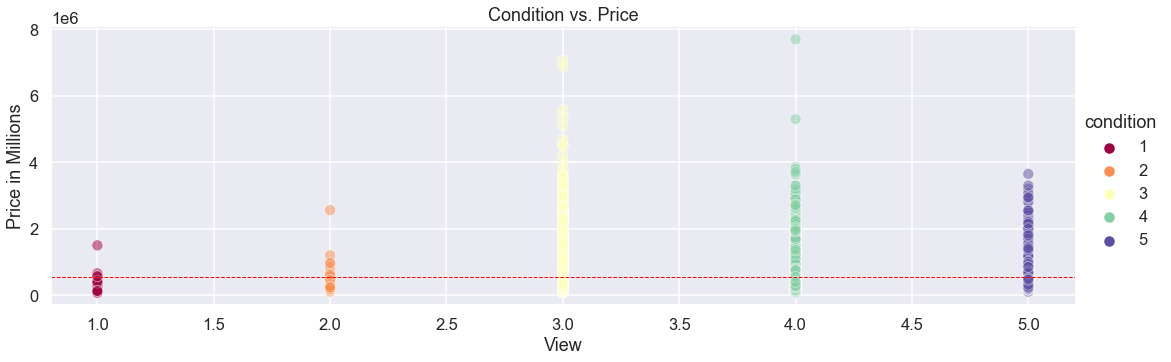

In [935]:
#plot 'condition' vs 'price' 
plt.figure(figsize = (15, 15))
sns.relplot(x = 'condition',
            y = 'price',
            hue = 'condition',
            data = kc_house,
            alpha = 0.5, s = 120, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Condition vs. Price')
plt.xlabel('View')
plt.ylabel('Price in Millions')

#show
plt.show()

In [936]:
#save
plt.savefig('./Data & Figures/condition_vs_price_relplot')

<Figure size 432x288 with 0 Axes>

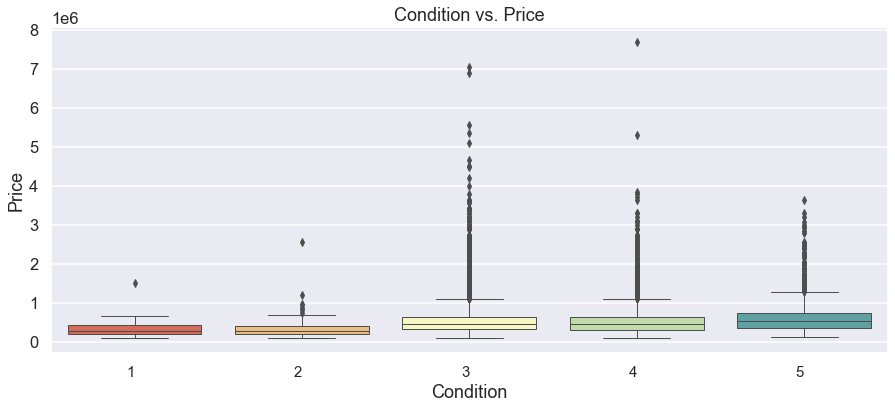

In [937]:
#plot 'condition' vs. 'price'
plt.figure(figsize = (15, 6))
sns.boxplot(x = kc_house['condition'], 
            y = kc_house['price'], 
            linewidth = 1,
            palette = 'Spectral')

#set labels
plt.title('Condition vs. Price')
plt.xlabel('Condition')
plt.ylabel('Price')

#set xticks
plt.xticks(ha = 'right', fontsize = 15)

#show
plt.show()

In [938]:
#save
plt.savefig('./Data & Figures/condition_vs_price_boxplot')

<Figure size 432x288 with 0 Axes>

### Grade: overall grade given to the housing unit, based on King County grading system

In [939]:
kc_house['grade'].nunique()

11

In [940]:
y_values = kc_house['grade'].value_counts(ascending = False)
x_values = y_values.index

y_values

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


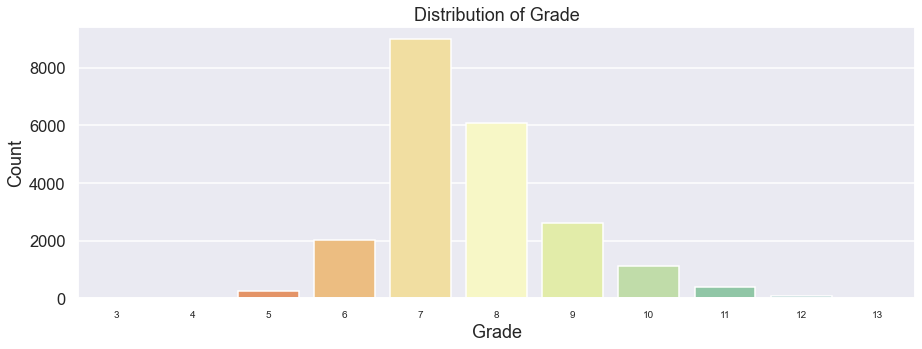

In [941]:
#plot 'grade' distribution
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, 
            palette = "Spectral")

#set labels
plt.title('Distribution of Grade')
plt.xlabel('Grade')
plt.ylabel('Count')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

In [942]:
#save
plt.savefig('./Data & Figures/grade_distribution_barplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

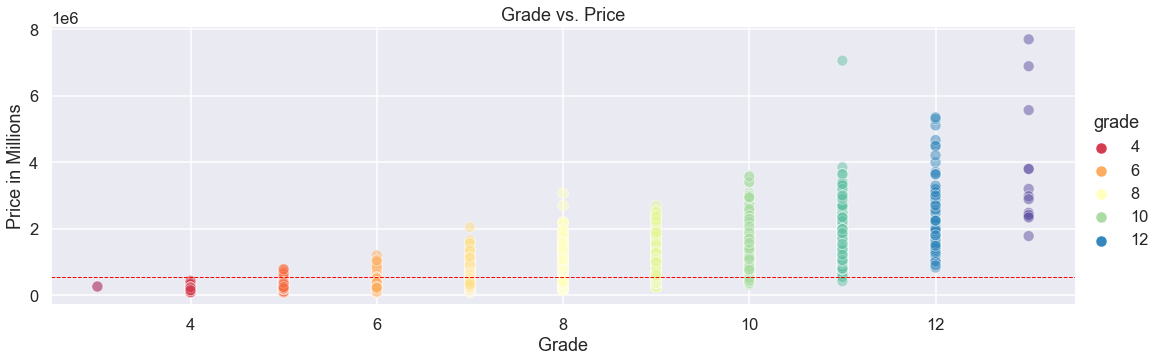

In [943]:
#plot 'grade' vs 'price' 
plt.figure(figsize = (15, 15))
sns.relplot(x = 'grade',
            y = 'price',
            hue = 'grade',
            data = kc_house,
            alpha = 0.5, s = 120, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Grade vs. Price')
plt.xlabel('Grade')
plt.ylabel('Price in Millions')

#show
plt.show()

In [944]:
#save
plt.savefig('./Data & Figures/grade_vs_price_relplot')

<Figure size 432x288 with 0 Axes>

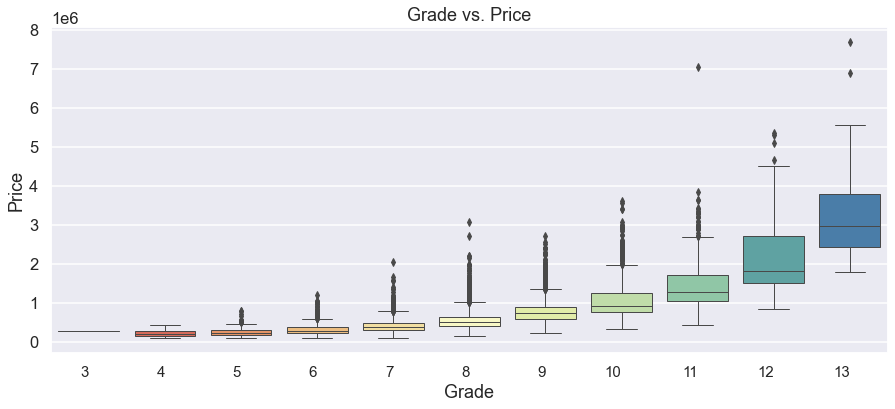

In [945]:
#plot 'grade' vs. 'price'
plt.figure(figsize = (15, 6))
sns.boxplot(x = kc_house['grade'], 
            y = kc_house['price'], 
            linewidth = 1,
            palette = 'Spectral')

#set labels
plt.title('Grade vs. Price')
plt.xlabel('Grade')
plt.ylabel('Price')

#set xticks
plt.xticks(ha = 'right', fontsize = 15)

#show
plt.show()

In [946]:
#save
plt.savefig('./Data & Figures/grade_vs_price_boxplot')

<Figure size 432x288 with 0 Axes>

## Time Data

In [947]:
kc_house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Location Data

<Figure size 1080x1080 with 0 Axes>

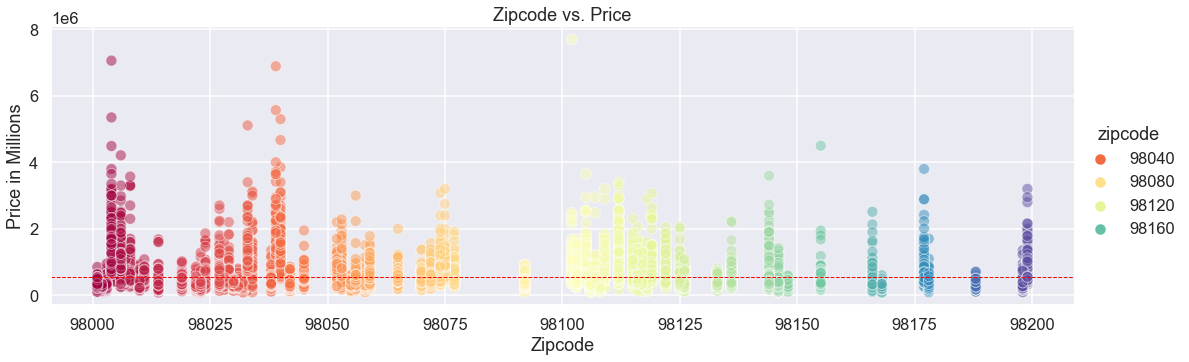

In [948]:
#plot 'zipcode' vs 'price' 
plt.figure(figsize = (15, 15))
sns.relplot(x = 'zipcode',
            y = 'price',
            hue = 'zipcode',
            data = kc_house,
            alpha = 0.5, s = 120, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Zipcode vs. Price')
plt.xlabel('Zipcode')
plt.ylabel('Price in Millions')

#show
plt.show()

In [949]:
#save
plt.savefig('./Data & Figures/zipcode_vs_price_relplot')

<Figure size 432x288 with 0 Axes>

# 4. EXPLORE CORRELATION

In [950]:
kc_house.corr()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016772  0.001150   0.005162    -0.012241 -0.131911   
price         -0.016772  1.000000  0.308787   0.525906     0.701917  0.089876   
bedrooms       0.001150  0.308787  1.000000   0.514508     0.578212  0.032471   
bathrooms      0.005162  0.525906  0.514508   1.000000     0.755758  0.088373   
sqft_living   -0.012241  0.701917  0.578212   0.755758     1.000000  0.173453   
sqft_lot      -0.131911  0.089876  0.032471   0.088373     0.173453  1.000000   
floors         0.018608  0.256804  0.177944   0.502582     0.353953 -0.004814   
waterfront    -0.004176  0.276295 -0.002386   0.067282     0.110230  0.023143   
view           0.011592  0.395734  0.078523   0.186451     0.282532  0.075298   
condition     -0.023803  0.036056  0.026496  -0.126479    -0.059445 -0.008830   
grade          0.008188  0.667951  0.356563   0.665838     0.762779  0.114731   
sqft_above    -0.010799  0.605368  0.479386   0.686668     0.876448  0.184139   
zipcode       -0.008211 -0.053402 -0.154092  -0.204786    -0.199802 -0.129586   
lat           -0.001798  0.306692 -0.009951   0.024280     0.052155 -0.085514   
long           0.020672  0.022036  0.132054   0.224903     0.241214  0.230227   
sqft_living15 -0.002701  0.585241  0.393406   0.569884     0.756402  0.144763   
sqft_lot15    -0.138557  0.082845  0.030690   0.088303     0.184342  0.718204   

                 floors  waterfront      view  condition     grade  \
id             0.018608   -0.004176  0.011592  -0.023803  0.008188   
price          0.256804    0.276295  0.395734   0.036056  0.667951   
bedrooms       0.177944   -0.002386  0.078523   0.026496  0.356563   
bathrooms      0.502582    0.067282  0.186451  -0.126479  0.665838   
sqft_living    0.353953    0.110230  0.282532  -0.059445  0.762779   
sqft_lot      -0.004814    0.023143  0.075298  -0.008830  0.114731   
floors         1.000000    0.021883  0.028436  -0.264075  0.458794   
waterfront     0.021883    1.000000  0.406654   0.017642  0.087383   
view           0.028436    0.406654  1.000000   0.045735  0.249727   
condition     -0.264075    0.017642  0.045735   1.000000 -0.146896   
grade          0.458794    0.087383  0.249727  -0.146896  1.000000   
sqft_above     0.523989    0.075463  0.166299  -0.158904  0.756073   
zipcode       -0.059541    0.031057  0.085277   0.002888 -0.185771   
lat            0.049239   -0.012772  0.006141  -0.015102  0.113575   
long           0.125943   -0.039864 -0.077894  -0.105877  0.200341   
sqft_living15  0.280102    0.088860  0.279561  -0.093072  0.713867   
sqft_lot15    -0.010722    0.032002  0.073332  -0.003126  0.120981   

               sqft_above   zipcode       lat      long  sqft_living15  \
id              -0.010799 -0.008211 -0.001798  0.020672      -0.002701   
price            0.605368 -0.053402  0.306692  0.022036       0.585241   
bedrooms         0.479386 -0.154092 -0.009951  0.132054       0.393406   
bathrooms        0.686668 -0.204786  0.024280  0.224903       0.569884   
sqft_living      0.876448 -0.199802  0.052155  0.241214       0.756402   
sqft_lot         0.184139 -0.129586 -0.085514  0.230227       0.144763   
floors           0.523989 -0.059541  0.049239  0.125943       0.280102   
waterfront       0.075463  0.031057 -0.012772 -0.039864       0.088860   
view             0.166299  0.085277  0.006141 -0.077894       0.279561   
condition       -0.158904  0.002888 -0.015102 -0.105877      -0.093072   
grade            0.756073 -0.185771  0.113575  0.200341       0.713867   
sqft_above       1.000000 -0.261570 -0.001199  0.344842       0.731767   
zipcode         -0.261570  1.000000  0.266742 -0.564259      -0.279299   
lat             -0.001199  0.266742  1.000000 -0.135371       0.048679   
long             0.344842 -0.564259 -0.135371  1.000000       0.335626   
sqft_living15    0.731767 -0.279299  0.048679  0.335626       1.000000   
sqft_lot15       0.195077 -0.147294 -0.0861

<AxesSubplot:>

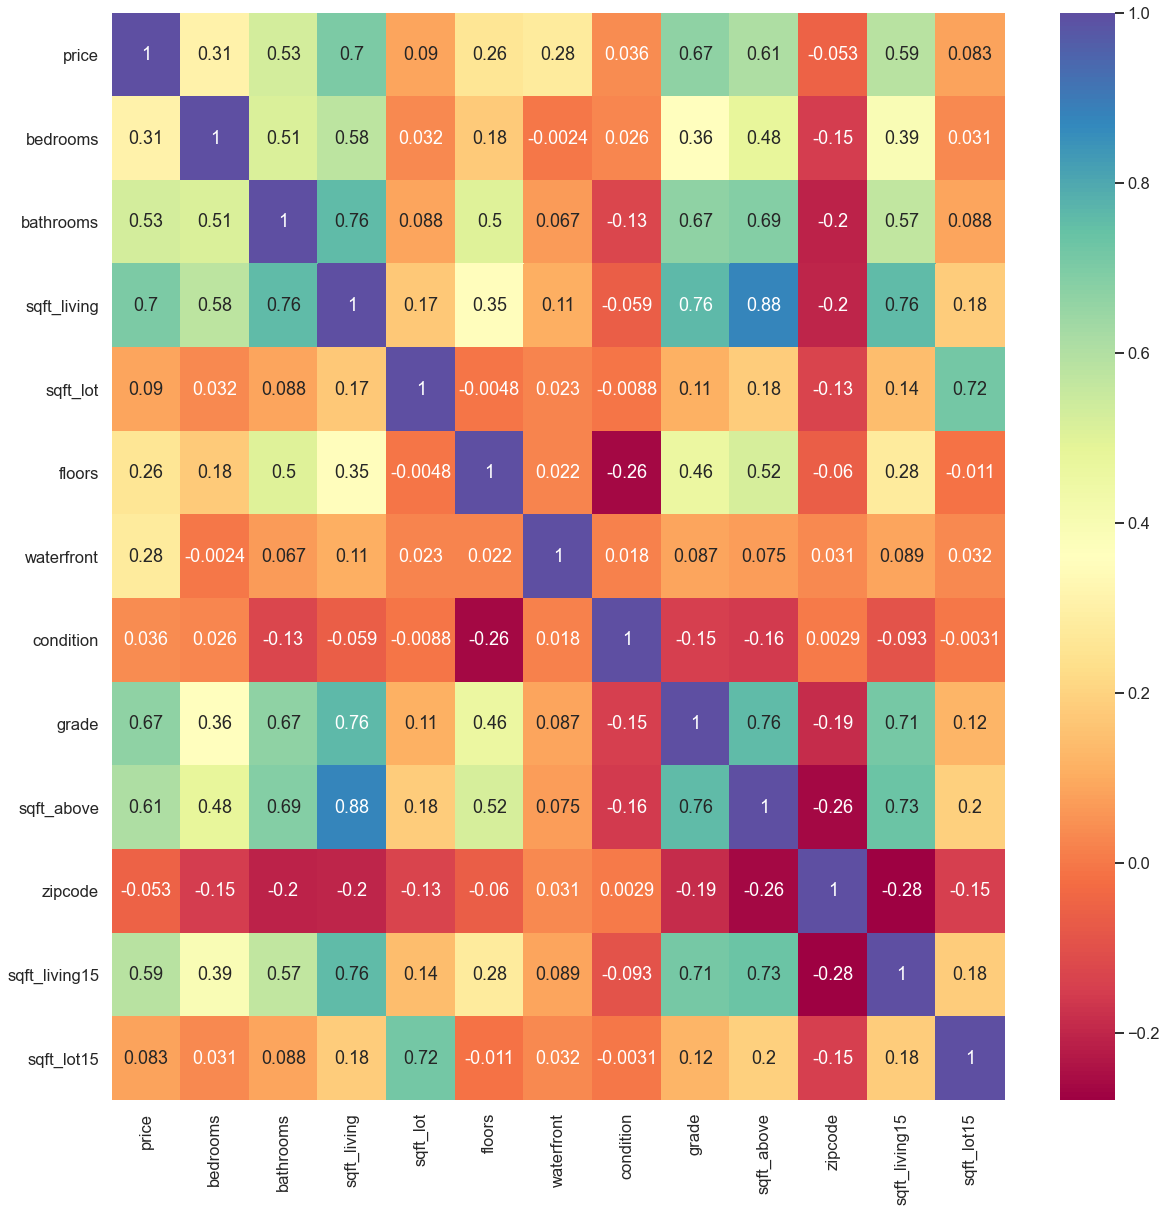

In [951]:
#heatmap for all the required features for correlation
kc_house_corr = kc_house[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
     'sqft_living15', 'sqft_lot15']]

fig, ax = plt.subplots(figsize = (20, 20)) 

sns.heatmap(kc_house_corr.corr(),cmap = 'Spectral', annot = True, ax = ax)

In [952]:
#save
plt.savefig('./Data & Figures/heatmap')

<Figure size 432x288 with 0 Axes>